In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null


In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz


In [ ]:
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


In [ ]:
import findspark
findspark.init()

In [ ]:
findspark.find()

'/content/spark-3.0.0-bin-hadoop3.2'

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

--2021-11-03 17:47:27--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 54.161.241.46, 18.205.222.128, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.19M  37.6MB/s    in 0.4s    

2021-11-03 17:47:27 (37.6 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
{"tunnels":[{"name":"command_line","uri":"/api/tunnels/command_line","public_url":"https://03d3-35-184-8-23.ngrok.io","proto":"https","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder \
    .appName("SentimentDetector")\
    .master("local[*]")\
    .config("spark.driver.memory","8G")\
    .config("spark.driver.maxResultSize", "2G")\
    .config("spark.jars", "/Users/maziyar/anaconda3/envs/spark/lib/python3.6/site-packages/sparknlp/lib/sparknlp.jar")\
    .config("spark.driver.extraClassPath", "/Users/maziyar/anaconda3/envs/spark/lib/python3.6/site-packages/sparknlp/lib/sparknlp.jar")\
    .config("spark.executor.extraClassPath", "/Users/maziyar/anaconda3/envs/spark/lib/python3.6/site-packages/sparknlp/lib/sparknlp.jar")\
    .config("spark.kryoserializer.buffer.max", "500m")\
    .getOrCreate()


In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')

In [ ]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
# import numpy as np
# df = df.replace(0, np.nan)
# df

In [ ]:

# df = df.dropna(subset=['toxic', 'severe_toxic', 'obscene', 'threat','insult','identity_hate'], how='all')
# df

In [ ]:

# df = df.replace(np.nan,0)

In [ ]:

# conditions = [
#     (df['toxic'] == 1),
#     (df['severe_toxic'] == 1),
#     (df['obscene'] ==1),
#     (df['threat'] ==1),
#     (df['insult'] ==1),
#     (df['identity_hate'] ==1),
#     ]

# # create a list of the values we want to assign for each condition
# values = ['toxic', 'severe_toxic', 'obscene', 'threat','insult','identity_hate']

# # create a new column and use np.select to assign values to it using our lists as arguments
# df['output'] = np.select(conditions, values)


In [ ]:

df_samp = df.sample(159571)
df_samp

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
2565,06deb5df37817a34,You are a Disgrace \nSitting there with no lif...,1,0,0,0,0,0
100670,1aca98c31cfe9e5e,"""\nIt looks like it was released the same way ...",0,0,0,0,0,0
61708,a52646c133ead785,"""\n\n Personal Attacks \n\nCalling me a racist...",0,0,0,0,0,0
135479,d498668d540625a4,He was a real good composser,0,0,0,0,0,0
24537,40d3ef9c9a8ee425,"Can the both of you go through this article, g...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
17800,2f0045384e3d8a80,", 7 March 2010 (UTC)\n\nI am not taking advice...",0,0,0,0,0,0
116941,71164493dbf26454,"""\n\n No offence, but """"heraldic chicken"""" sou...",0,0,0,0,0,0
79113,d3c0a0719f5aaff8,"""\n The Real Life Barnstar For your great wor...",0,0,0,0,0,0
105219,32ec63b223da0e63,"Go worship your jewish god, sub-human.",1,0,0,0,1,1


In [ ]:

sdf = spark.createDataFrame(df_samp)

In [ ]:
type(sdf)
sdf.show()

+----------------+--------------------+-----+------------+-------+------+------+-------------+
|              id|        comment_text|toxic|severe_toxic|obscene|threat|insult|identity_hate|
+----------------+--------------------+-----+------------+-------+------+------+-------------+
|06deb5df37817a34|You are a Disgrac...|    1|           0|      0|     0|     0|            0|
|1aca98c31cfe9e5e|"
It looks like i...|    0|           0|      0|     0|     0|            0|
|a52646c133ead785|"

 Personal Atta...|    0|           0|      0|     0|     0|            0|
|d498668d540625a4|He was a real goo...|    0|           0|      0|     0|     0|            0|
|40d3ef9c9a8ee425|Can the both of y...|    0|           0|      0|     0|     0|            0|
|691e28926ef53e13|"It's really very...|    0|           0|      0|     0|     0|            0|
|92ae145ee19e354a|Above the War Fro...|    0|           0|      0|     0|     0|            0|
|6caafd7a9a76d6a0|People went to Ir...|    0|     

In [ ]:
!pip install -q findspark


In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

! pip install --ignore-installed -q spark-nlp==2.7.5

import sparknlp

spark = sparknlp.start(spark23=True)

Exception: ignored

In [ ]:
import sparknlp

spark = sparknlp.start()

print("Spark NLP version", sparknlp.version())
print("Apache Spark version:", spark.version)

Spark NLP version 2.7.5
Apache Spark version: 3.0.0


In [ ]:
sdf.show()

+----------------+--------------------+-----+------------+-------+------+------+-------------+
|              id|        comment_text|toxic|severe_toxic|obscene|threat|insult|identity_hate|
+----------------+--------------------+-----+------------+-------+------+------+-------------+
|39dde44cace17f9d|Pontic Greek 

Ku...|    0|           0|      0|     0|     0|            0|
|7c7e8fcd3acd638f|Regents licks a t...|    1|           0|      0|     0|     1|            1|
|d0d0adbecea79bac|Also, I was just ...|    0|           0|      0|     0|     0|            0|
|4034e8d36a6f38cd|Haujobb-3.jpg
I h...|    0|           0|      0|     0|     0|            0|
|8e32fc9c5b75acc6|I didn't take it ...|    0|           0|      0|     0|     0|            0|
|2a78389e8739f2cd|":::::::::::::I a...|    0|           0|      0|     0|     0|            0|
|7b324a2ff0657561|Please do not add...|    0|           0|      0|     0|     0|            0|
|9fbbfb56e0e3a4d4|P.s. Be sure that...|    0|     

In [ ]:
sdf.show(truncate=False)

+----------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
os.environ["JAVA_HOME"]
! java -version

openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [ ]:
text = 'Peter Parker is a nice guy and lives in New York'

spark_df = spark.createDataFrame([[text]]).toDF("text")

spark_df.show(truncate=False)

+------------------------------------------------+
|text                                            |
+------------------------------------------------+
|Peter Parker is a nice guy and lives in New York|
+------------------------------------------------+



In [ ]:
from pyspark.sql.types import StringType, IntegerType

# if you want to create a spark datafarme from a list of strings

text_list = ['Peter Parker is a nice guy and lives in New York.', 'Bruce Wayne is also a nice guy and lives in Gotham City.']

spark.createDataFrame(text_list, StringType()).toDF("text").show(truncate=80)

+--------------------------------------------------------+
|                                                    text|
+--------------------------------------------------------+
|       Peter Parker is a nice guy and lives in New York.|
|Bruce Wayne is also a nice guy and lives in Gotham City.|
+--------------------------------------------------------+



In [ ]:
from pyspark.sql import Row

spark.createDataFrame(list(map(lambda x: Row(text=x), text_list))).show(truncate=80)

+--------------------------------------------------------+
|                                                    text|
+--------------------------------------------------------+
|       Peter Parker is a nice guy and lives in New York.|
|Bruce Wayne is also a nice guy and lives in Gotham City.|
+--------------------------------------------------------+



In [ ]:
import os
os.environ['PYTHONPATH']  = "~/.ivy2/jars/JohnSnowLabs_spark-nlp-1.6.0.jar:$PYTHONPATH"
os.environ['PYSPARK_DRIVER_PYTHON'] = "jupyter"
os.environ['PYSPARK_DRIVER_PYTHON_OPTS'] = "notebook"
os.environ['SPARK_SUBMIT_OPTIONS'] = "--packages JohnSnowLabs:spark-nlp:1.6.0"


TypeError: ignored

In [ ]:
sdf.printSchema()


root
 |-- id: string (nullable = true)
 |-- comment_text: string (nullable = true)
 |-- toxic: long (nullable = true)
 |-- severe_toxic: long (nullable = true)
 |-- obscene: long (nullable = true)
 |-- threat: long (nullable = true)
 |-- insult: long (nullable = true)
 |-- identity_hate: long (nullable = true)



In [ ]:
sdf.select('comment_text').show()

+--------------------+
|        comment_text|
+--------------------+
|FUCK OFF YOU COMP...|
|"

 WP article on...|
|"

Article

This ...|
|Alright look, I w...|
|I did not attack ...|
|This is a user wh...|
|That's not the po...|
|However inactive,...|
|Apologies - its n...|
|you still missed ...|
|", 18 December 20...|
|Begging 

Why are...|
|WHY did you take ...|
|I would expect th...|
|Aaron Crow
The Fo...|
|"
""Designing for...|
|if you have any q...|
|) as well as seve...|
|A tag has been pl...|
|Thanks for coming...|
+--------------------+
only showing top 20 rows



In [ ]:
sdf.select(
 'toxic',
 'severe_toxic',
 'obscene',
 'threat',
 'insult',
 'identity_hate').show()

+-----+------------+-------+------+------+-------------+
|toxic|severe_toxic|obscene|threat|insult|identity_hate|
+-----+------------+-------+------+------+-------------+
|    1|           0|      1|     0|     1|            0|
|    0|           0|      0|     0|     0|            0|
|    0|           0|      0|     0|     0|            0|
|    0|           0|      0|     0|     0|            0|
|    0|           0|      0|     0|     0|            0|
|    0|           0|      0|     0|     0|            0|
|    0|           0|      0|     0|     0|            0|
|    0|           0|      0|     0|     0|            0|
|    0|           0|      0|     0|     0|            0|
|    1|           0|      1|     0|     1|            0|
|    0|           0|      0|     0|     0|            0|
|    1|           0|      1|     0|     1|            0|
|    0|           0|      0|     0|     0|            0|
|    0|           0|      0|     0|     0|            0|
|    0|           0|      0|   

In [ ]:
sdf.toPandas()['toxic'].isnull().sum()

0

In [ ]:
sdf.toPandas()['severe_toxic'].isnull().sum()

0

In [ ]:
sdf.toPandas()['obscene'].isnull().sum()

0

In [ ]:
sdf.toPandas()['threat'].isnull().sum()

0

In [ ]:
sdf.toPandas()['insult'].isnull().sum()

0

In [ ]:
sdf.toPandas()['identity_hate'].isnull().sum()

0

In [ ]:
import pyspark.ml.feature
dir(pyspark.ml.feature)

['Binarizer',
 'BucketedRandomProjectionLSH',
 'BucketedRandomProjectionLSHModel',
 'Bucketizer',
 'ChiSqSelector',
 'ChiSqSelectorModel',
 'CountVectorizer',
 'CountVectorizerModel',
 'DCT',
 'ElementwiseProduct',
 'FeatureHasher',
 'HasAggregationDepth',
 'HasBlockSize',
 'HasCheckpointInterval',
 'HasCollectSubModels',
 'HasDistanceMeasure',
 'HasElasticNetParam',
 'HasFeaturesCol',
 'HasFitIntercept',
 'HasHandleInvalid',
 'HasInputCol',
 'HasInputCols',
 'HasLabelCol',
 'HasLoss',
 'HasMaxIter',
 'HasNumFeatures',
 'HasOutputCol',
 'HasOutputCols',
 'HasParallelism',
 'HasPredictionCol',
 'HasProbabilityCol',
 'HasRawPredictionCol',
 'HasRegParam',
 'HasRelativeError',
 'HasSeed',
 'HasSolver',
 'HasStandardization',
 'HasStepSize',
 'HasThreshold',
 'HasThresholds',
 'HasTol',
 'HasValidationIndicatorCol',
 'HasVarianceCol',
 'HasWeightCol',
 'HashingTF',
 'IDF',
 'IDFModel',
 'Imputer',
 'ImputerModel',
 'IndexToString',
 'Interaction',
 'JavaEstimator',
 'JavaMLReadable',
 'Jav

In [ ]:
categories = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
df_samp[categories].sum()

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import re

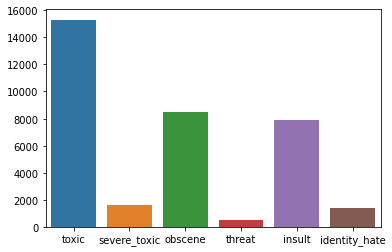

In [ ]:
sns.barplot(x=categories,y=df_samp[categories].sum())
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stopwords = set(STOPWORDS)



wc = WordCloud(background_color='white',
               max_words=100,
               stopwords=stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def get_words(df,label):
    words = []
    for row in df[df[label]==1].iloc[:]['comment_text']:
        words += clean_text(row)
    return ' '.join(words)

In [ ]:
def clean_text(row):
    words = []
    for w in row.split():
        word = re.sub('[^A-Za-z0-9]+', '', str(w))
        words.append(word.lower())
    return words

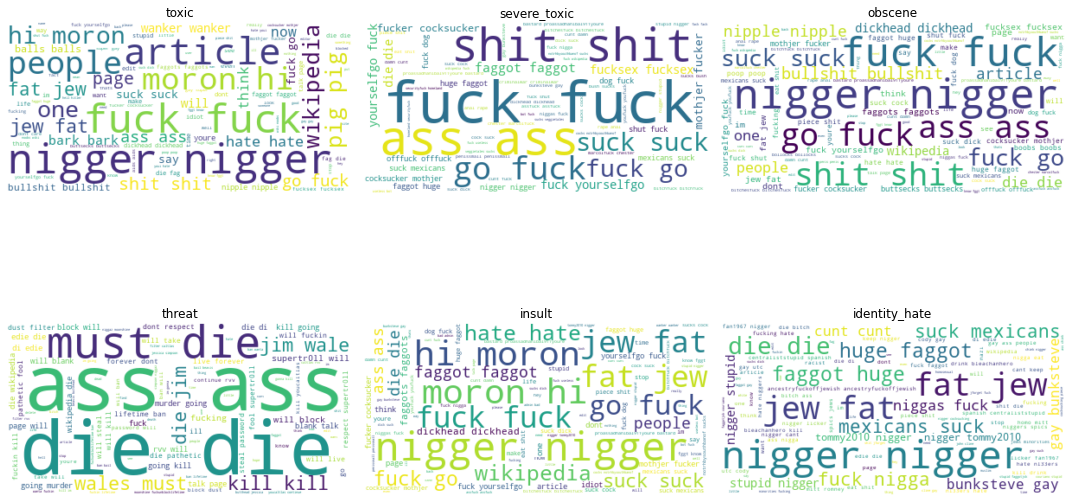

In [ ]:

fig = plt.figure(figsize=(15,10))

for i,l in enumerate(categories):
    wc.generate(get_words(df_samp,l))
    fig.add_subplot(2,3,i+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(l)
    plt.axis('off')

fig.tight_layout()
plt.show()


In [ ]:
import pyspark.sql.functions as F
import pyspark.sql.types as T
from pyspark.ml.feature import Tokenizer, HashingTF, IDF
from pyspark.ml.classification import LogisticRegression

out_cols = [i for i in sdf.columns if i not in ["id", "comment_text"]]
sdf.show(5)

+----------------+--------------------+-----+------------+-------+------+------+-------------+
|              id|        comment_text|toxic|severe_toxic|obscene|threat|insult|identity_hate|
+----------------+--------------------+-----+------------+-------+------+------+-------------+
|ab6a988244e8c3ef|FUCK OFF YOU COMP...|    1|           0|      1|     0|     1|            0|
|97a32286722e30a0|"

 WP article on...|    0|           0|      0|     0|     0|            0|
|16c05a31693b89a8|"

Article

This ...|    0|           0|      0|     0|     0|            0|
|5f4fb373710c0747|Alright look, I w...|    0|           0|      0|     0|     0|            0|
|105f9b335451782b|I did not attack ...|    0|           0|      0|     0|     0|            0|
+----------------+--------------------+-----+------------+-------+------+------+-------------+
only showing top 5 rows



In [ ]:
sdf.filter(F.col('toxic') == 1).show(5)

+----------------+--------------------+-----+------------+-------+------+------+-------------+
|              id|        comment_text|toxic|severe_toxic|obscene|threat|insult|identity_hate|
+----------------+--------------------+-----+------------+-------+------+------+-------------+
|ab6a988244e8c3ef|FUCK OFF YOU COMP...|    1|           0|      1|     0|     1|            0|
|7c1c3b63074cce08|you still missed ...|    1|           0|      1|     0|     1|            0|
|714f742709971c12|Begging 

Why are...|    1|           0|      1|     0|     1|            0|
|83fd7f9e6312bf31|"

 YOU ARE BLOCK...|    1|           0|      0|     0|     0|            0|
|2c261ffa88c0eed4|FUCK VUVUZELAS FU...|    1|           0|      1|     0|     0|            0|
+----------------+--------------------+-----+------------+-------+------+------+-------------+
only showing top 5 rows



In [ ]:
# Basic sentence tokenizer
tokenizer = Tokenizer(inputCol="comment_text", outputCol="words")
wordsData = tokenizer.transform(sdf)

In [ ]:
# Count the words in a document
hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures")
tf = hashingTF.transform(wordsData)

In [ ]:
tf.select('rawFeatures').take(2)

[Row(rawFeatures=SparseVector(262144, {9056: 1.0, 154336: 1.0, 214962: 1.0, 235436: 1.0, 237111: 1.0})),
 Row(rawFeatures=SparseVector(262144, {154: 1.0, 5078: 1.0, 22417: 1.0, 27576: 2.0, 28828: 1.0, 32890: 1.0, 35473: 1.0, 38711: 1.0, 38819: 1.0, 42404: 1.0, 46177: 2.0, 48448: 1.0, 55039: 1.0, 56124: 1.0, 61734: 1.0, 64358: 1.0, 67192: 1.0, 67416: 1.0, 68105: 1.0, 75078: 1.0, 75412: 1.0, 77229: 1.0, 77767: 1.0, 78896: 1.0, 84705: 1.0, 87567: 1.0, 89762: 1.0, 92342: 1.0, 95889: 8.0, 95894: 1.0, 96004: 1.0, 97921: 1.0, 106776: 5.0, 106841: 1.0, 107107: 1.0, 108690: 1.0, 113432: 1.0, 114159: 1.0, 114374: 1.0, 116796: 1.0, 117451: 1.0, 126466: 1.0, 130136: 1.0, 133769: 1.0, 138218: 1.0, 140623: 1.0, 143203: 1.0, 166027: 1.0, 172187: 1.0, 174611: 1.0, 186160: 1.0, 186544: 1.0, 193554: 1.0, 194107: 1.0, 196696: 1.0, 196839: 1.0, 199693: 1.0, 211361: 1.0, 215083: 1.0, 219087: 5.0, 219915: 4.0, 220268: 1.0, 221138: 1.0, 222808: 1.0, 233271: 2.0, 240944: 1.0, 242040: 1.0, 249180: 10.0, 250855

In [ ]:
# Build the idf model and transform the original token frequencies into their tf-idf counterparts
idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(tf) 
tfidf = idfModel.transform(tf)

In [ ]:
tfidf.select("features").first()

Row(features=SparseVector(262144, {9056: 3.8126, 154336: 4.9909, 214962: 0.8212, 235436: 10.3708, 237111: 4.2138}))

In [ ]:
REG = 0.1

In [ ]:
lr = LogisticRegression(maxIter=50, featuresCol="features", labelCol='toxic', regParam=REG)


In [ ]:
tfidf.show()

+----------------+--------------------+-----+------------+-------+------+------+-------------+--------------------+--------------------+--------------------+
|              id|        comment_text|toxic|severe_toxic|obscene|threat|insult|identity_hate|               words|         rawFeatures|            features|
+----------------+--------------------+-----+------------+-------+------+------+-------------+--------------------+--------------------+--------------------+
|ab6a988244e8c3ef|FUCK OFF YOU COMP...|    1|           0|      1|     0|     1|            0|[fuck, off, you, ...|(262144,[9056,154...|(262144,[9056,154...|
|97a32286722e30a0|"

 WP article on...|    0|           0|      0|     0|     0|            0|[", , , wp, artic...|(262144,[154,5078...|(262144,[154,5078...|
|16c05a31693b89a8|"

Article

This ...|    0|           0|      0|     0|     0|            0|[", , article, , ...|(262144,[9781,100...|(262144,[9781,100...|
|5f4fb373710c0747|Alright look, I w...|    0|       

In [ ]:
lrModel = lr.fit(tfidf.limit(159571))

res_train = lrModel.transform(tfidf)
    # Obtain the objective per iteration
  

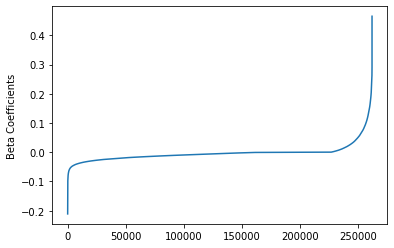

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

In [ ]:
# Print the coefficients and intercept for multinomial logistic regression
print("Coefficients: \n" + str(lrModel.coefficientMatrix))
print("Intercept: " + str(lrModel.interceptVector))

trainingSummary = lrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")

# for multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("True positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("Precision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print("Recall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i, rec))

print("F-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))

accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))


Coefficients: 
DenseMatrix([[-0.00820848, -0.00801624, -0.02251765, ...,  0.00924093,
              -0.00804754, -0.01266482]])
Intercept: [-2.0950974737093144]
objectiveHistory:
False positive rate by label:
label 0: 0.38374525957891986
label 1: 0.000214864462111078
True positive rate by label:
label 0: 0.999785135537889
label 1: 0.6162547404210802
Precision by label:
label 0: 0.9609033074642774
label 1: 0.9967216582064298
Recall by label:
label 0: 0.999785135537889
label 1: 0.6162547404210802
F-measure by label:
label 0: 0.9799586945297427
label 1: 0.7616161616161616
Accuracy: 0.9630258630954246
FPR: 0.34698598713645556
TPR: 0.9630258630954246
F-measure: 0.959031767341342
Precision: 0.9643362987737915
Recall: 0.9630258630954246


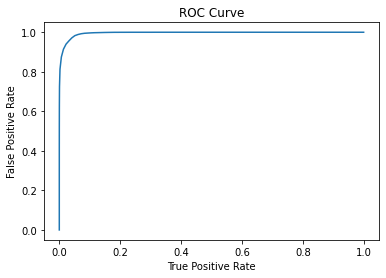

Training set areaUnderROC: 0.9957174718865948


In [ ]:
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

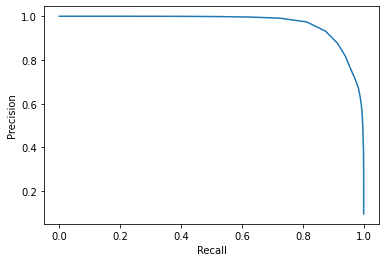

In [ ]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
res_train.select("id", "toxic", "probability", "prediction").show(20)

+----------------+-----+--------------------+----------+
|              id|toxic|         probability|prediction|
+----------------+-----+--------------------+----------+
|ab6a988244e8c3ef|    1|[0.62193921274190...|       0.0|
|97a32286722e30a0|    0|[0.99746545580281...|       0.0|
|16c05a31693b89a8|    0|[0.96670778592190...|       0.0|
|5f4fb373710c0747|    0|[0.97747116669653...|       0.0|
|105f9b335451782b|    0|[0.93889769707294...|       0.0|
|da0e6df76f56ad7c|    0|[0.97556183477823...|       0.0|
|00645ad8c6be7dba|    0|[0.95225866304854...|       0.0|
|e3f15df896997d49|    0|[0.89803306740344...|       0.0|
|a313afb2bf51c702|    0|[0.96843937049461...|       0.0|
|7c1c3b63074cce08|    1|[0.87123556117996...|       0.0|
|4e391b6690e9b592|    0|[0.98185215813516...|       0.0|
|714f742709971c12|    1|[0.23974580054495...|       1.0|
|489d702d6c6ba034|    0|[0.87706863414148...|       0.0|
|8aaf2827fd869991|    0|[0.98586902420900...|       0.0|
|bc08919a340c4781|    0|[0.9714

In [ ]:
res_train.show(5)

+----------------+--------------------+-----+------------+-------+------+------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|              id|        comment_text|toxic|severe_toxic|obscene|threat|insult|identity_hate|               words|         rawFeatures|            features|       rawPrediction|         probability|prediction|
+----------------+--------------------+-----+------------+-------+------+------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|ab6a988244e8c3ef|FUCK OFF YOU COMP...|    1|           0|      1|     0|     1|            0|[fuck, off, you, ...|(262144,[9056,154...|(262144,[9056,154...|[0.49778736370998...|[0.62193921274190...|       0.0|
|97a32286722e30a0|"

 WP article on...|    0|           0|      0|     0|     0|            0|[", , , wp, artic...|(262144,[154,5078...|(262144,[154,5078...

In [ ]:
extract_prob = F.udf(lambda x: float(x[1]), T.FloatType())


In [ ]:
(res_train.withColumn("proba", extract_prob("probability"))
 .select("proba", "prediction")
 .show())

+------------+----------+
|       proba|prediction|
+------------+----------+
|   0.3780608|       0.0|
| 0.002534544|       0.0|
| 0.033292215|       0.0|
| 0.022528833|       0.0|
| 0.061102305|       0.0|
| 0.024438165|       0.0|
|  0.04774134|       0.0|
|  0.10196693|       0.0|
|  0.03156063|       0.0|
|  0.12876444|       0.0|
| 0.018147841|       0.0|
|   0.7602542|       1.0|
|  0.12293137|       0.0|
| 0.014130976|       0.0|
| 0.028555054|       0.0|
| 0.016936291|       0.0|
| 0.044009123|       0.0|
|  0.07356342|       0.0|
|0.0013599034|       0.0|
|  0.01962284|       0.0|
+------------+----------+
only showing top 20 rows



In [ ]:
import pandas as pd
test = pd.read_csv('test.csv')

In [ ]:
import numpy as np

test = spark.createDataFrame(test)

In [ ]:
test_tokens = tokenizer.transform(test)
test_tf = hashingTF.transform(test_tokens)
test_tfidf = idfModel.transform(test_tf)

In [ ]:
test_res = test.select('id','comment_text')
test_res.head()

Row(id='00001cee341fdb12', comment_text="Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,")

In [ ]:
tfidf.show()

+----------------+--------------------+-----+------------+-------+------+------+-------------+--------------------+--------------------+--------------------+
|              id|        comment_text|toxic|severe_toxic|obscene|threat|insult|identity_hate|               words|         rawFeatures|            features|
+----------------+--------------------+-----+------------+-------+------+------+-------------+--------------------+--------------------+--------------------+
|ab6a988244e8c3ef|FUCK OFF YOU COMP...|    1|           0|      1|     0|     1|            0|[fuck, off, you, ...|(262144,[9056,154...|(262144,[9056,154...|
|97a32286722e30a0|"

 WP article on...|    0|           0|      0|     0|     0|            0|[", , , wp, artic...|(262144,[154,5078...|(262144,[154,5078...|
|16c05a31693b89a8|"

Article

This ...|    0|           0|      0|     0|     0|            0|[", , article, , ...|(262144,[9781,100...|(262144,[9781,100...|
|5f4fb373710c0747|Alright look, I w...|    0|       

In [ ]:
test_probs = []
for col in out_cols:
    print(col)
    lr = LogisticRegression(maxIter=56, featuresCol="features", labelCol=col, regParam=REG)
    print("...fitting")
    lrModel = lr.fit(tfidf)
    print("...predicting")
    res = lrModel.transform(test_tfidf)
    print("...appending result")
    test_res = test_res.join(res.select('id', 'probability'), on="id")
    print("...extracting probability")
    test_res = test_res.withColumn(col, extract_prob('probability')).drop("probability")
    beta = np.sort(lrModel.coefficients)
    plt.plot(beta)
    plt.ylabel('Beta Coefficients')
    plt.show()
    trainingSummary = lrModel.summary
    
    # for multiclass, we can inspect metrics on a per-label basis
    print("False positive rate by label:")
    for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
        print("label %d: %s" % (i, rate))

    print("True positive rate by label:")
    for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
        print("label %d: %s" % (i, rate))

    print("Precision by label:")
    for i, prec in enumerate(trainingSummary.precisionByLabel):
        print("label %d: %s" % (i, prec))

    print("Recall by label:")
    for i, rec in enumerate(trainingSummary.recallByLabel):
        print("label %d: %s" % (i, rec))

    print("F-measure by label:")
    for i, f in enumerate(trainingSummary.fMeasureByLabel()):
        print("label %d: %s" % (i, f))

    accuracy = trainingSummary.accuracy
    falsePositiveRate = trainingSummary.weightedFalsePositiveRate
    truePositiveRate = trainingSummary.weightedTruePositiveRate
    fMeasure = trainingSummary.weightedFMeasure()
    precision = trainingSummary.weightedPrecision
    recall = trainingSummary.weightedRecall
    print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
          % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

    test_res.show(5)

    roc = trainingSummary.roc.toPandas()
    plt.plot(roc['FPR'],roc['TPR'])
    plt.ylabel('False Positive Rate')
    plt.xlabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))
        
    pr = trainingSummary.pr.toPandas()
    plt.plot(pr['recall'],pr['precision'])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()

toxic
...fitting


In [ ]:
test_res.show()

In [ ]:
pandas_df = test_res.select("*").toPandas()


In [ ]:
pandas_df

In [ ]:
pandas_df.to_csv('results_2.csv', index=False)